In [1]:
'''Importing, Understanding, and Inspecting Data :

Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.'''

'Importing, Understanding, and Inspecting Data :\n\nPerform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.\n\nBased on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.\n\nGet a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.'

In [2]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#Loading the data set
hc=pandas.read_excel('/Users/phani/Documents/DataAnalytics/Data Capstone/1585743985_datasets_healthcare/data.xlsx')
hc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hc.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
hc.shape

(303, 14)

In [6]:
hc.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
pandas.set_option("display.float", "{:.2f}".format)
hc.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
hc.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Identifying the categorical variables

In [9]:
'''Identify the data variables which might be categorical in nature. '''

cat_val=[]
con_val=[]
for column in hc.columns:
    if len(hc[column].unique()) <= 10:
        cat_val.append(column)
    else:
        con_val.append(column)

In [10]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
hc.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
duplicate1=hc[hc.duplicated()]
duplicate1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


In [13]:
hc1=hc.drop_duplicates(keep="first",inplace=True)
len(hc)

302

In [14]:
hc2=hc.copy()
len(hc2)

302

In [15]:
hc2['SEX']=np.where(hc2['sex']==0,'Female','Male')
hc2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,SEX
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1,Male
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1,Male
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1,Female
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1,Male
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1,Female


# Countplot for categorical variables

Text(0.5, 1.0, 'Sex Vs Target')

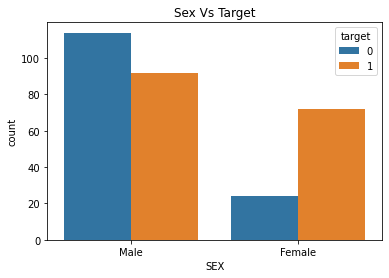

In [17]:
'''Describe and explore these variables using appropriate tools. For example: count plot.'''
sns.countplot(data=hc2,x="SEX",hue="target")
plt.title("Sex Vs Target")

Text(0.5, 1.0, 'Chest Pain Vs SEX')

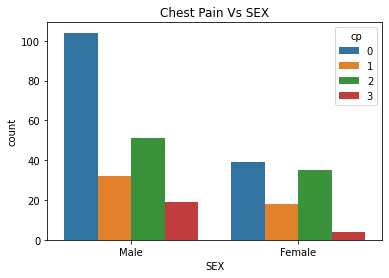

In [21]:
sns.countplot(data=hc2,x='SEX',hue='cp')
plt.title("Chest Pain Vs SEX")

Text(0.5, 1.0, 'Chest Pain Vs Target')

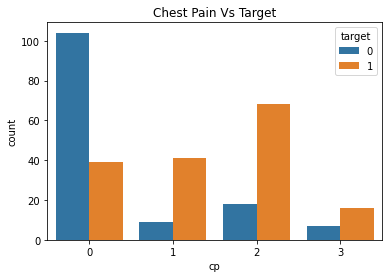

In [22]:
sns.countplot(data=hc2,x='cp',hue='target')
plt.title("Chest Pain Vs Target")

Text(0.5, 1.0, 'Fast Blood Sugar Vs Target')

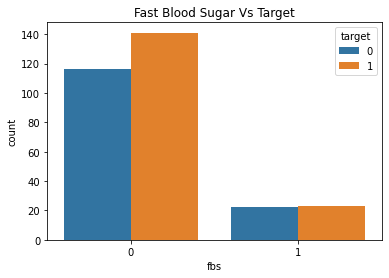

In [19]:
sns.countplot(data=hc2,x='fbs',hue='target')
plt.title("Fast Blood Sugar Vs Target")

Text(0.5, 1.0, 'Fast Blood Sugar Vs Sex')

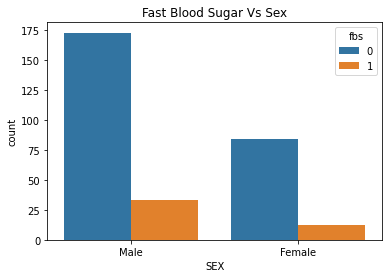

In [23]:
sns.countplot(data=hc2,x='SEX',hue='fbs')
plt.title("Fast Blood Sugar Vs Sex")

Text(0.5, 1.0, 'Resting ECG Vs Target')

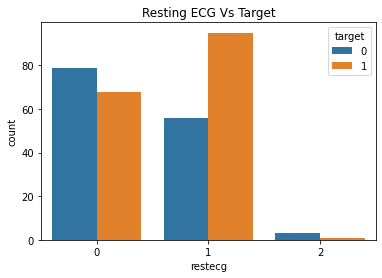

In [24]:
sns.countplot(data=hc2,x='restecg',hue='target')
plt.title("Resting ECG Vs Target")

Text(0.5, 1.0, 'Resting ECG Vs Sex')

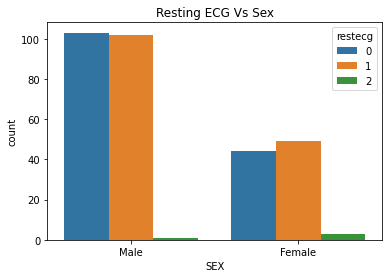

In [25]:
sns.countplot(data=hc2,x='SEX',hue='restecg')
plt.title("Resting ECG Vs Sex")

Text(0.5, 1.0, 'Exercise induced anigma Vs Target')

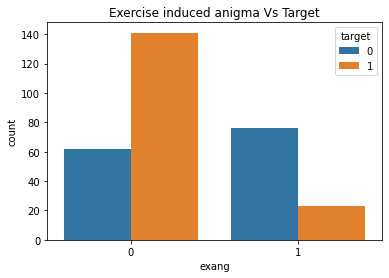

In [26]:
sns.countplot(data=hc2,x='exang',hue='target')
plt.title("Exercise induced anigma Vs Target")

Text(0.5, 1.0, 'Exercise induced anigma Vs SEX')

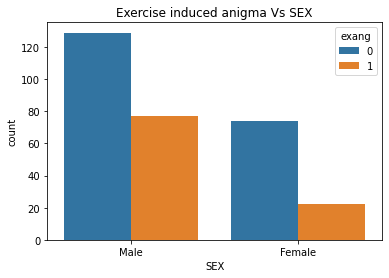

In [27]:
sns.countplot(data=hc2,x='SEX',hue='exang')
plt.title("Exercise induced anigma Vs SEX")

Text(0.5, 1.0, 'Slope Vs Target')

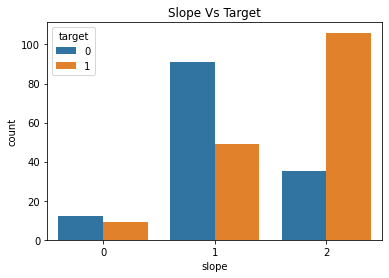

In [28]:
sns.countplot(data=hc2,x='slope',hue='target')
plt.title("Slope Vs Target")

Text(0.5, 1.0, 'Slope Vs Sex')

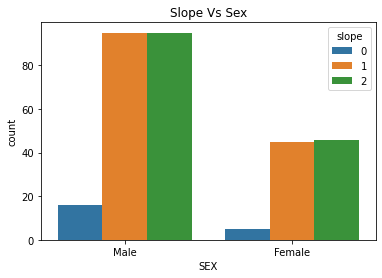

In [29]:
sns.countplot(data=hc2,x='SEX',hue='slope')
plt.title("Slope Vs Sex")

Text(0.5, 1.0, 'Number of major vessels colored by flurosopy Vs Target')

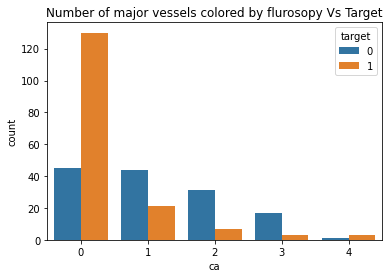

In [30]:
sns.countplot(data=hc2,x='ca',hue='target')
plt.title("Number of major vessels colored by flurosopy Vs Target")

Text(0.5, 1.0, 'Number of major vessels colored by flurosopy Vs SEX')

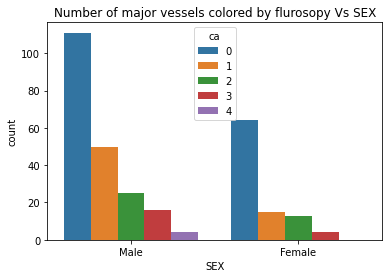

In [31]:
sns.countplot(data=hc2,x='SEX',hue='ca')
plt.title("Number of major vessels colored by flurosopy Vs SEX")

Text(0.5, 1.0, 'Age Vs Target')

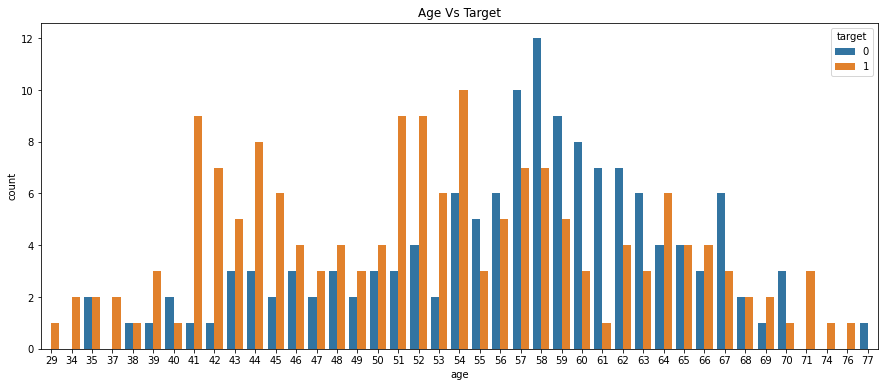

In [39]:
#Study the occurrence of CVD across different ages
fig_dims=(15,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.countplot(data=hc2,x='age',hue='target',ax=ax)
plt.legend(loc='upper right',title='target')
plt.title("Age Vs Target")

Text(0.5, 1.0, 'Boxplot grouped by trestbps and target')

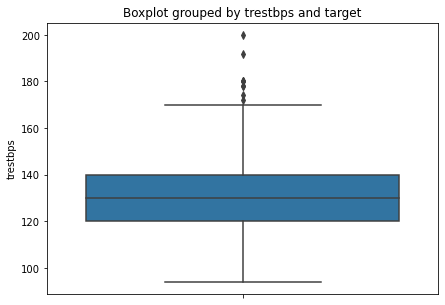

In [49]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?
fig_dims=(7,5)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(data=hc2,y='trestbps',hue='target',ax=ax)
plt.title("Boxplot grouped by trestbps and target")



([<matplotlib.patches.Wedge at 0x123ea8c10>,
 [Text(-0.5955797151805878, 0.9248160913746095, 'Male'),
  Text(0.5955797151805882, -0.9248160913746093, 'Female')],
 [Text(-0.3248616628257751, 0.504445140749787, '68.2'),
  Text(0.32486166282577533, -0.5044451407497869, '31.8')])

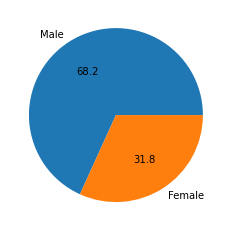

In [50]:
#Study the composition of overall patients w.r.t . gender.

plt.pie(hc2['SEX'].value_counts(),autopct='%.1f',labels=['Male','Female'])

In [51]:
'''Describe the relationship between cholesterol levels and our target variable.

What can be concluded about the relationship between peak exercising and occurrence of heart attack?

Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?'''

hc2.groupby('target')[['chol','slope','thal']].corr()

chol  slope  thal
target                         
0      chol   1.00   0.00  0.07
       slope  0.00   1.00  0.03
       thal   0.07   0.03  1.00
1      chol   1.00   0.05  0.08
       slope  0.05   1.00  0.00
       thal   0.08   0.00  1.00

<AxesSubplot:>

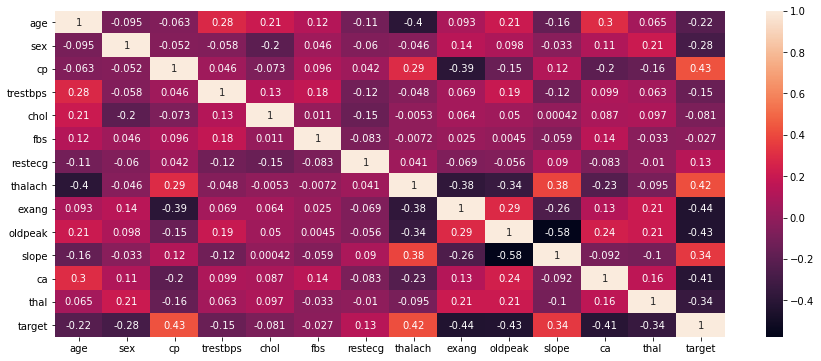

In [54]:
fig_dims=(15,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(data=hc2.corr(),annot=True)

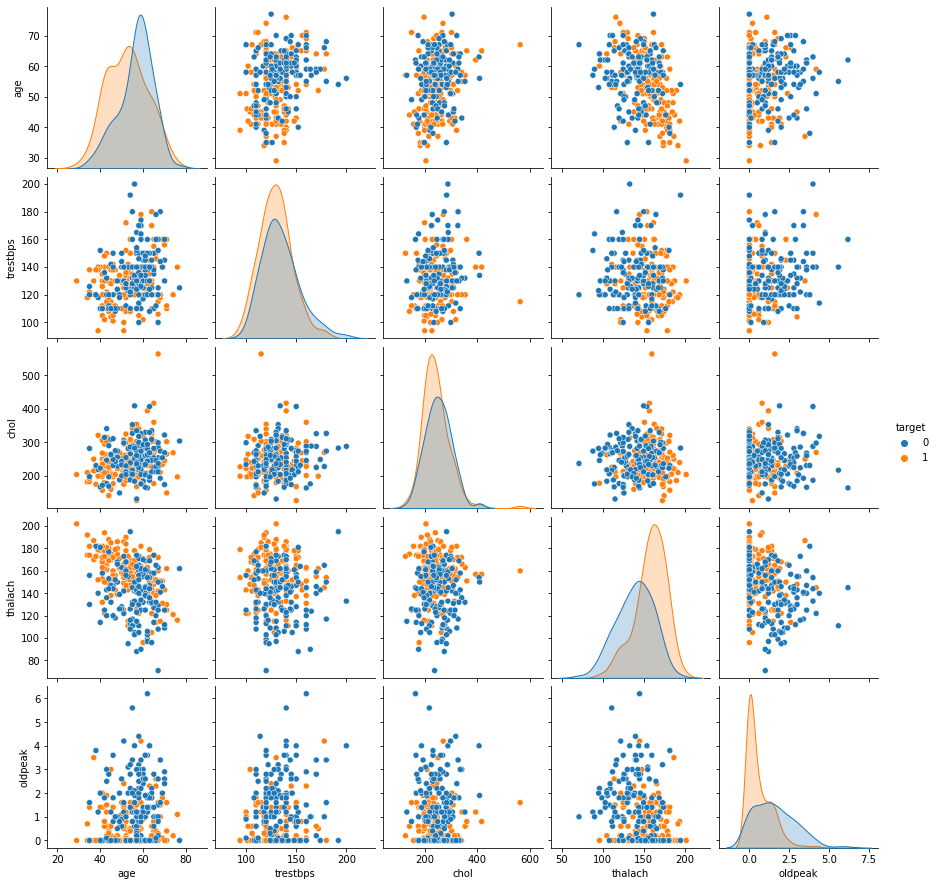

In [55]:
#Use a pair plot to understand the relationship between all the given variables.
sns.pairplot(hc2,x_vars=['age','trestbps','chol','thalach','oldpeak'],
             y_vars=['age','trestbps','chol','thalach','oldpeak'],hue='target')

# Logistic Regression

In [57]:
#Perform logistic regression, predict the outcome for test data, 
# and validate the results by using the confusion matrix.

# for faster processing we take only mean columns as inpendendent vars
feature_mean=list(hc2.columns[0:13])
feature_mean

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [58]:
# we need to find the correlation between independent vars. so that if two or more variables are highly correlated,
# we keep only one of them as its a duplicacy of the data
corr=hc2[feature_mean].corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.00,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.07
sex,-0.09,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.05,0.14,0.10,-0.03,0.11,0.21
cp,-0.06,-0.05,1.00,0.05,-0.07,0.10,0.04,0.29,-0.39,-0.15,0.12,-0.20,-0.16
trestbps,0.28,-0.06,0.05,1.00,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06
chol,0.21,-0.20,-0.07,0.13,1.00,0.01,-0.15,-0.01,0.06,0.05,0.00,0.09,0.10
fbs,0.12,0.05,0.10,0.18,0.01,1.00,-0.08,-0.01,0.02,0.00,-0.06,0.14,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.08,-0.01
thalach,-0.40,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.38,-0.23,-0.09
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1.00,0.29,-0.26,0.13,0.21
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.00,-0.06,-0.34,0.29,1.00,-0.58,0.24,0.21


<AxesSubplot:>

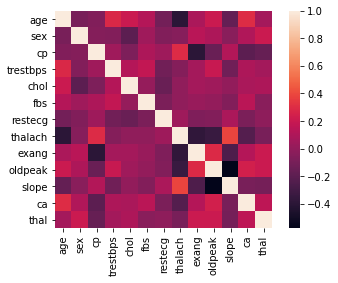

In [59]:
sns.heatmap(corr,cbar=True,square=True)

In [65]:
x=hc2.drop(['target','SEX'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,hc2.target,test_size=0.3,random_state=3)
print("Shape of train_x is",x_train.shape)
print("Shape of train_y is",y_train.shape)
print("Shape of test_x is",x_test.shape)
print("Shape of test_y is",y_test.shape)

Shape of train_x is (211, 13)
Shape of train_y is (211,)
Shape of test_x is (91, 13)
Shape of test_y is (91,)


In [67]:
model=LogisticRegression()
model.fit(x_train,y_train)
pv=model.predict(x_test)
print("Accuracy of the test data is", accuracy_score(pv,y_test))
print(confusion_matrix(pv,y_test))

Accuracy of the test data is 0.8571428571428571
[[26  3]
 [10 52]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Tableau Link

In [ ]:
https://public.tableau.com/views/Project3_ExaminingFactorsResponsibleforHeartAttacks_16338168027850/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link